In [1]:
import numpy as np 
import pandas as pd 
from pandas import Series, DataFrame 

import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set_style('whitegrid')
%matplotlib inline

In [2]:
from pandas_datareader import DataReader 

from datetime import datetime 

from __future__ import division 

In [3]:
tech_list = ['AAPL','GOOGL','MSFT','AMZN']

end = datetime.now()
start = datetime(end.year-1,end.month,end.day)

for stock in tech_list: 
    globals()[stock] = DataReader(stock,'yahoo',start,end)

In [4]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-05-18,79.125000,77.580002,78.292503,78.739998,135178400.0,78.212997
2020-05-19,79.629997,78.252502,78.757500,78.285004,101729600.0,77.761040
2020-05-20,79.879997,79.129997,79.169998,79.807503,111504800.0,79.273354
2020-05-21,80.222504,78.967499,79.665001,79.212502,102688800.0,78.682327
2020-05-22,79.807503,78.837502,78.942497,79.722504,81803200.0,79.188927


In [5]:
AAPL.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,117.757599,114.703849,116.337669,116.259573,1.280447e+08,115.825404
std,16.420914,15.993195,16.345629,16.179933,5.251111e+07,16.280252
min,79.125000,77.580002,78.292503,78.285004,4.669130e+07,77.761040
25%,112.177498,108.725002,110.403749,110.274998,9.030280e+07,109.734428
50%,121.515003,118.705002,120.090000,120.109997,1.127522e+08,119.901588
75%,129.727501,126.772501,128.540001,127.950003,1.532816e+08,127.717728
max,145.089996,141.369995,143.600006,143.160004,3.743368e+08,142.704010


In [6]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2020-05-18 to 2021-05-17
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       252 non-null    float64
 1   Low        252 non-null    float64
 2   Open       252 non-null    float64
 3   Close      252 non-null    float64
 4   Volume     252 non-null    float64
 5   Adj Close  252 non-null    float64
dtypes: float64(6)
memory usage: 13.8 KB


<AxesSubplot:xlabel='Date'>

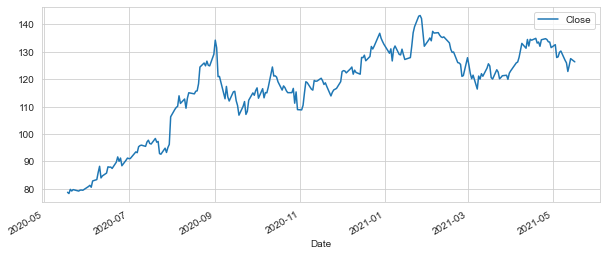

In [7]:
AAPL['Close'].plot(legend= True,figsize=(10,4))

<AxesSubplot:xlabel='Date'>

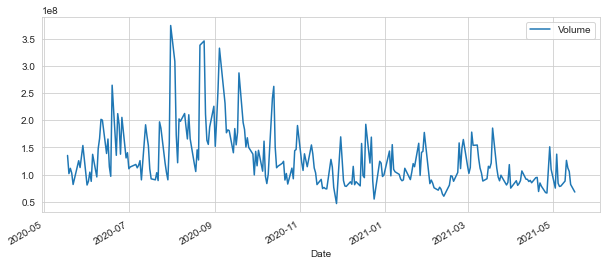

In [8]:
AAPL['Volume'].plot(legend=True, figsize=(10,4))

In [10]:
MA_day = [10,20,50,100]

for ma in MA_day: 
    column_name = 'MA for %s days'%(str(ma))
    AAPL[column_name] = AAPL['Close'].rolling(window=ma).mean()

<AxesSubplot:xlabel='Date'>

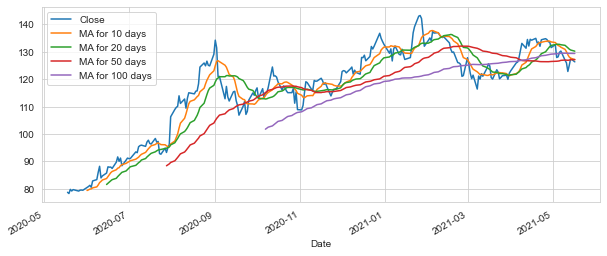

In [11]:
AAPL[['Close','MA for 10 days','MA for 20 days','MA for 50 days','MA for 100 days']].plot(subplots=False,figsize=(10,4))

<AxesSubplot:xlabel='Date'>

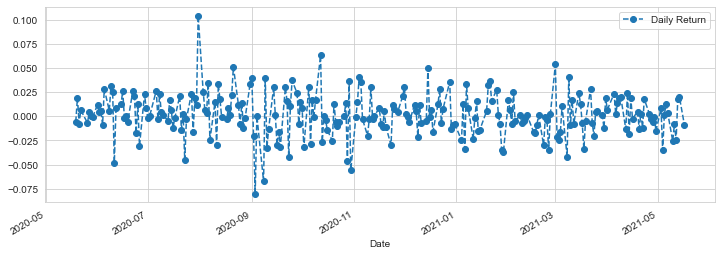

In [13]:
AAPL['Daily Return'] = AAPL['Close'].pct_change()

AAPL['Daily Return'].plot(figsize=(12,4), legend=True, linestyle='--',marker='o')

<AxesSubplot:>

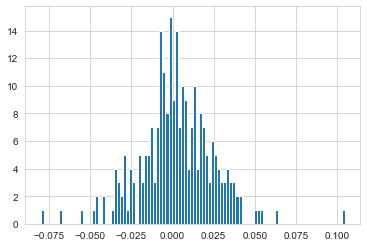

In [14]:
AAPL['Daily Return'].hist(bins=100)

C:\Users\guddu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Daily Return', ylabel='Density'>

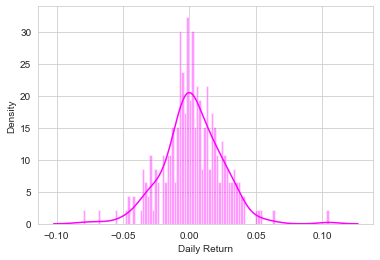

In [15]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='magenta')

In [17]:
closingprice_df = DataReader(tech_list,'yahoo',start,end)['Close']

In [18]:
closingprice_df.head(10)

Symbols,AAPL,GOOGL,MSFT,AMZN
Date,,,,
2020-05-18,78.739998,1385.180054,184.910004,2426.260010
2020-05-19,78.285004,1374.400024,183.630005,2449.330078
2020-05-20,79.807503,1409.160034,185.660004,2497.939941
2020-05-21,79.212502,1406.750000,183.429993,2446.739990
2020-05-22,79.722504,1413.239990,183.509995,2436.879883
2020-05-26,79.182503,1421.369995,181.570007,2421.860107
2020-05-27,79.527496,1420.280029,181.809998,2410.389893
2020-05-28,79.562500,1418.239990,181.399994,2401.100098
2020-05-29,79.485001,1433.520020,183.250000,2442.370117


In [19]:
tech_returns = closingprice_df.pct_change()

In [20]:
tech_returns.head()

Symbols,AAPL,GOOGL,MSFT,AMZN
Date,,,,
2020-05-18,NaN,NaN,NaN,NaN
2020-05-19,-0.005778,-0.007782,-0.006922,0.009508
2020-05-20,0.019448,0.025291,0.011055,0.019846
2020-05-21,-0.007455,-0.001710,-0.012011,-0.020497
2020-05-22,0.006438,0.004613,0.000436,-0.004030


C:\Users\guddu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


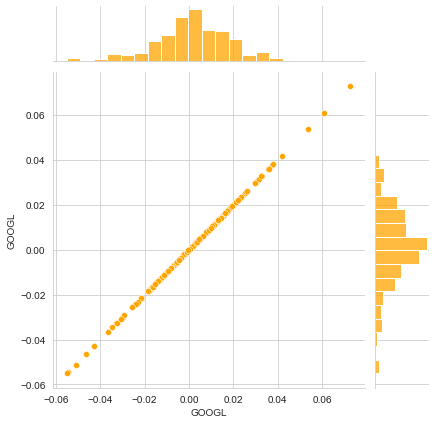

In [21]:
sns.jointplot('GOOGL','GOOGL',tech_returns,kind='scatter',color='orange')

C:\Users\guddu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\guddu\anaconda3\lib\site-packages\seaborn\axisgrid.py:2073: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


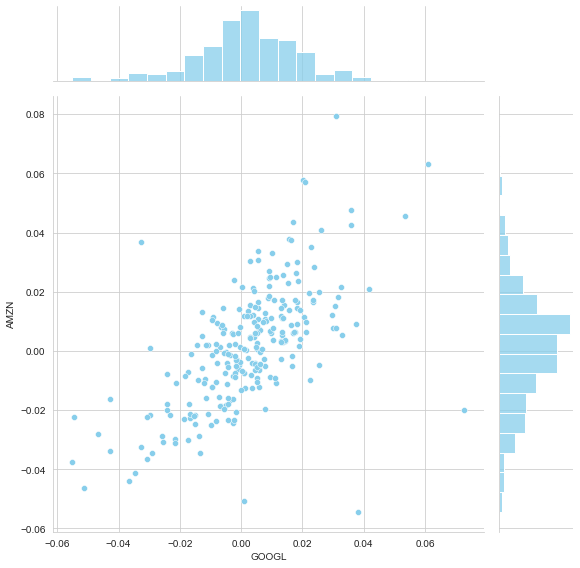

In [22]:
sns.jointplot('GOOGL','AMZN',tech_returns,kind='scatter',size=8,color='skyblue')

C:\Users\guddu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\guddu\anaconda3\lib\site-packages\seaborn\axisgrid.py:2073: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


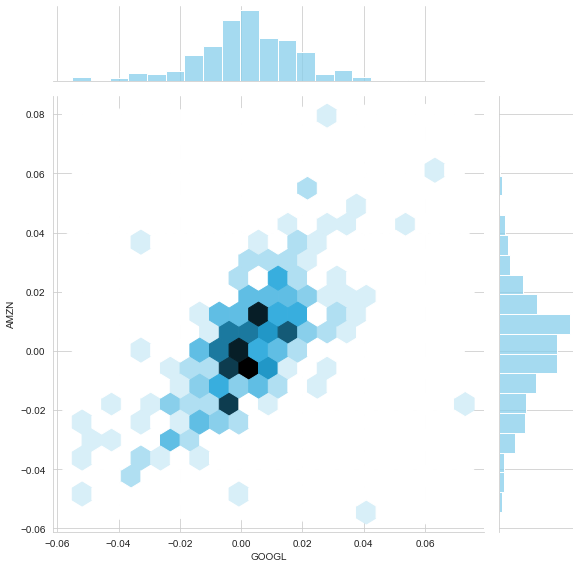

In [23]:
sns.jointplot('GOOGL','AMZN',tech_returns,kind='hex',size=8,color='skyblue')

C:\Users\guddu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\guddu\anaconda3\lib\site-packages\seaborn\axisgrid.py:2073: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


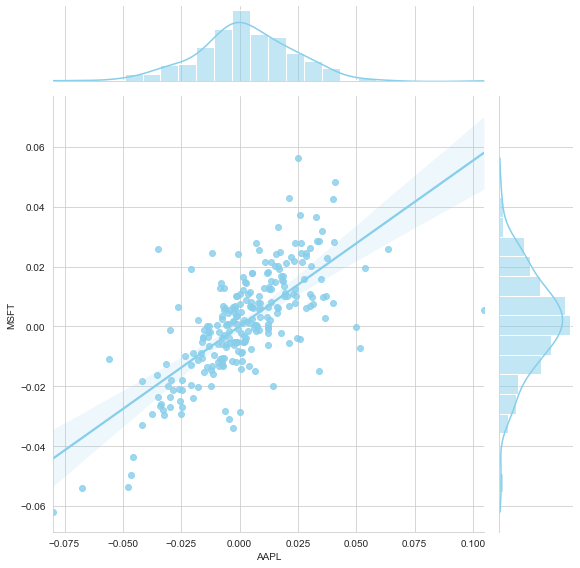

In [25]:
sns.jointplot('AAPL','MSFT',tech_returns,kind='reg',size=8,color='skyblue')

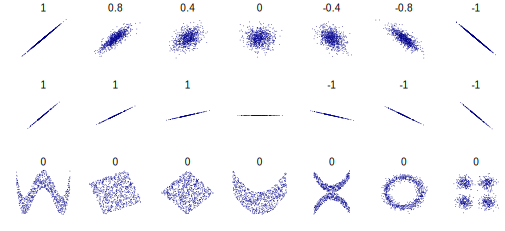

In [26]:
from IPython.display import SVG 
SVG(url='http://upload.wikimedia.org/wikipedia/commons/d/d4/Correlation_examples2.svg')

C:\Users\guddu\anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


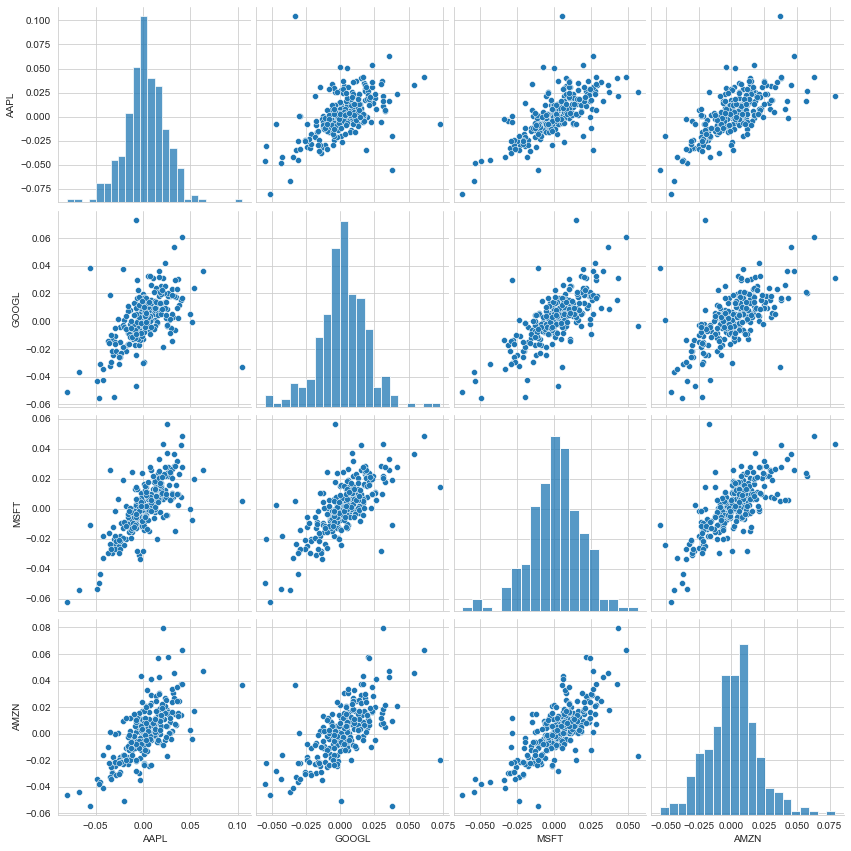

In [27]:
sns.pairplot(tech_returns.dropna(),size=3)

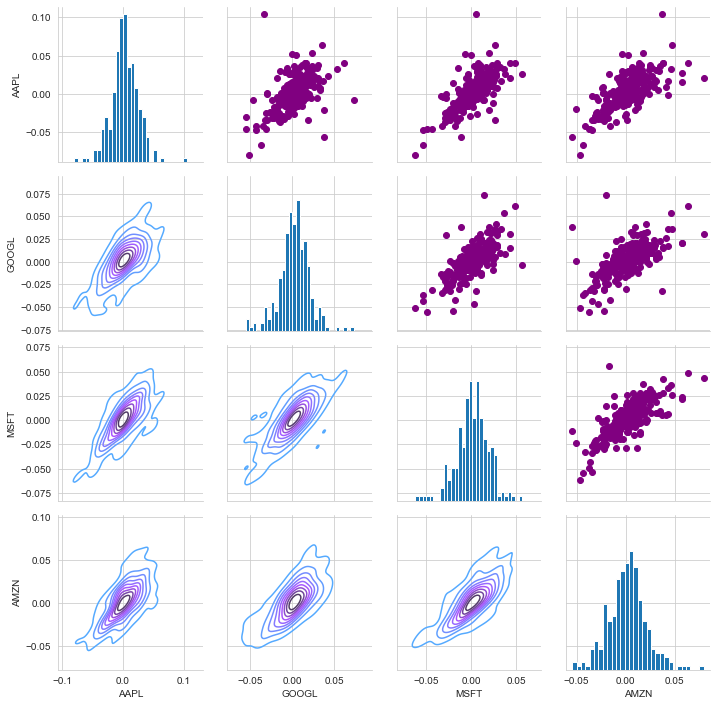

In [28]:
returns_fig = sns.PairGrid(tech_returns.dropna())

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

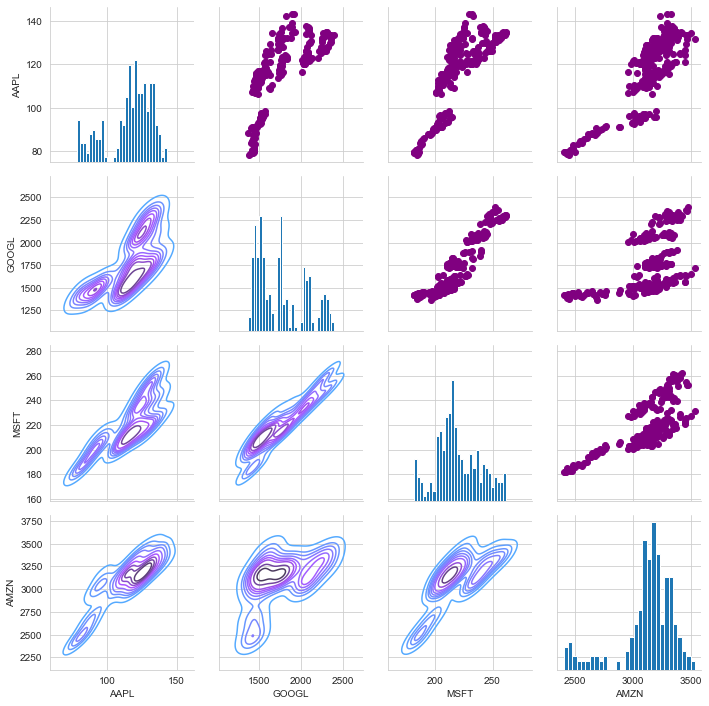

In [29]:
returns_fig = sns.PairGrid(closingprice_df.dropna())

returns_fig.map_upper(plt.scatter,color='purple')

returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

returns_fig.map_diag(plt.hist,bins=30)

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

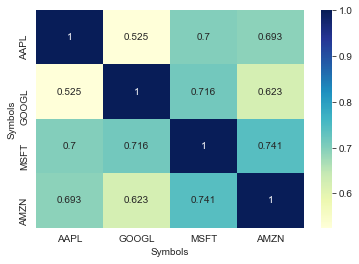

In [30]:
sns.heatmap(tech_returns.corr(),annot=True,fmt=".3g",cmap='YlGnBu')

<AxesSubplot:xlabel='Symbols', ylabel='Symbols'>

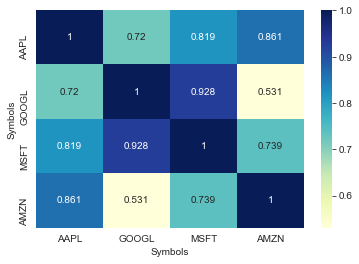

In [31]:
sns.heatmap(closingprice_df.corr(),annot=True,fmt='.3g',cmap='YlGnBu')

In [32]:
rets = tech_returns.dropna()

In [33]:
rets.head()

Symbols,AAPL,GOOGL,MSFT,AMZN
Date,,,,
2020-05-19,-0.005778,-0.007782,-0.006922,0.009508
2020-05-20,0.019448,0.025291,0.011055,0.019846
2020-05-21,-0.007455,-0.001710,-0.012011,-0.020497
2020-05-22,0.006438,0.004613,0.000436,-0.004030
2020-05-26,-0.006774,0.005753,-0.010572,-0.006164


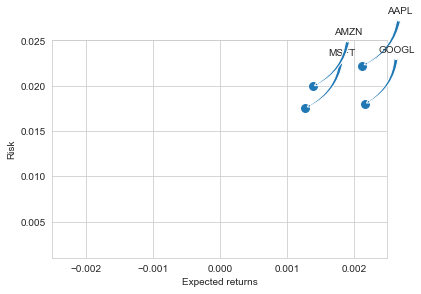

In [34]:
area = np.pi*20 

plt.scatter(rets.mean(),rets.std(),s=area)

plt.xlim([-0.0025,0.0025])
plt.ylim([0.001,0.025])

plt.xlabel('Expected returns')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns,rets.mean(),rets.std()):
    plt.annotate(
    label,
    xy = (x,y), xytext = (50,50),
    textcoords = 'offset points', ha = 'right', va ='bottom',
    arrowprops = dict(arrowstyle = 'fancy', connectionstyle = 'arc3,rad = -0.3'))

C:\Users\guddu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Daily Return', ylabel='Density'>

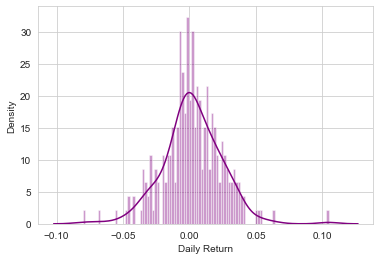

In [35]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

In [37]:
rets["AAPL"].quantile(0.05)

-0.03378332389833655

The 0.05 empirical quantile of daily returns is at -0.033. That means that with 95% confidence, out worst daily loss will not exceed 3.3%. If we have a 1 million dollar investment, our one day 5% VaR is 0.033 * 1,000,000 = $33,000.

In [38]:
rets["AMZN"].quantile(0.05)

-0.030360281729524374

In [39]:
rets["GOOGL"].quantile(0.05)

-0.02972873037306145

In [40]:
rets["MSFT"].quantile(0.05)

-0.028152025512473422

In [41]:
rets.head()

Symbols,AAPL,GOOGL,MSFT,AMZN
Date,,,,
2020-05-19,-0.005778,-0.007782,-0.006922,0.009508
2020-05-20,0.019448,0.025291,0.011055,0.019846
2020-05-21,-0.007455,-0.001710,-0.012011,-0.020497
2020-05-22,0.006438,0.004613,0.000436,-0.004030
2020-05-26,-0.006774,0.005753,-0.010572,-0.006164


In [42]:
days = 365 

dt = 1/days 

mu = rets.mean()['GOOGL']

sigma = rets.std()['GOOGL']

In [43]:
def stock_monte_carlo(start_price,days,mu,sigma):
    
    price = np.zeros(days)
    price[0] = start_price 
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        
        shock[x] = np.random.normal(loc = mu * dt, scale = sigma * np.sqrt(dt))
        drift[x] = mu * dt 
        price[x] = price[x-1]+ (price[x-1]*(drift[x] + shock[x]))
        
    return price

In [44]:
GOOGL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-05-18,1392.760010,1354.199951,1361.579956,1385.180054,2354700,1385.180054
2020-05-19,1392.489990,1373.760010,1385.479980,1374.400024,1579300,1374.400024
2020-05-20,1412.030029,1387.420044,1389.160034,1409.160034,1913100,1409.160034
2020-05-21,1416.459961,1394.390015,1410.989990,1406.750000,1544700,1406.750000
2020-05-22,1417.000000,1395.949951,1403.900024,1413.239990,1427200,1413.239990


Text(0.5, 1.0, 'Monte Carlo Analysis for Google')

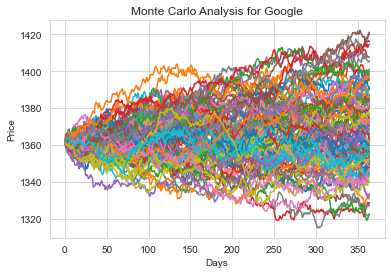

In [47]:
start_price = 1361.579956 

for run in range(100): 
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
    
plt.xlabel("Days")
plt.ylabel("Price")
plt.title('Monte Carlo Analysis for Google')

In [46]:
AMZN.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-05-18,2433.000000,2384.010010,2404.350098,2426.260010,4357200,2426.260010
2020-05-19,2485.000000,2428.969971,2429.830078,2449.330078,4320500,2449.330078
2020-05-20,2500.010010,2467.270020,2477.870117,2497.939941,3998100,2497.939941
2020-05-21,2525.449951,2442.540039,2500.000000,2446.739990,5114400,2446.739990
2020-05-22,2469.850098,2430.129883,2455.010010,2436.879883,2867100,2436.879883


Text(0.5, 1.0, 'Monte Carlo Analysis for Amazon')

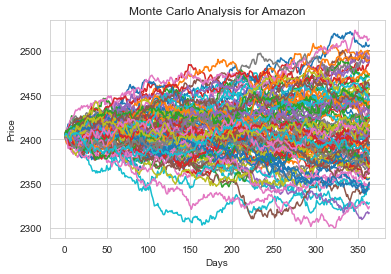

In [48]:
start_price = 2404.350098 

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
    
plt.xlabel("Days")
plt.ylabel("Price")
plt.title('Monte Carlo Analysis for Amazon')

In [49]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close,MA for 10 days,MA for 20 days,MA for 50 days,MA for 100 days,Daily Return
Date,,,,,,,,,,,
2020-05-18,79.125000,77.580002,78.292503,78.739998,135178400.0,78.212997,NaN,NaN,NaN,NaN,NaN
2020-05-19,79.629997,78.252502,78.757500,78.285004,101729600.0,77.761040,NaN,NaN,NaN,NaN,-0.005778
2020-05-20,79.879997,79.129997,79.169998,79.807503,111504800.0,79.273354,NaN,NaN,NaN,NaN,0.019448
2020-05-21,80.222504,78.967499,79.665001,79.212502,102688800.0,78.682327,NaN,NaN,NaN,NaN,-0.007455
2020-05-22,79.807503,78.837502,78.942497,79.722504,81803200.0,79.188927,NaN,NaN,NaN,NaN,0.006438


Text(0.5, 1.0, 'Monte Carlo Analysis for Apple')

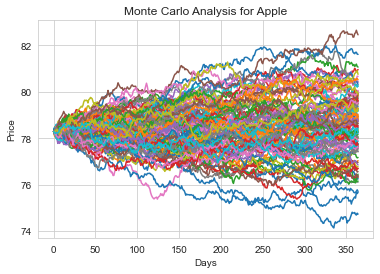

In [50]:
start_price = 78.292503 

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))

plt.xlabel("Days")
plt.ylabel("Price")
plt.title('Monte Carlo Analysis for Apple')

In [51]:
MSFT.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-05-18,186.199997,183.960007,185.750000,184.910004,35264500.0,183.049850
2020-05-19,186.600006,183.490005,185.029999,183.630005,26799100.0,181.782730
2020-05-20,185.850006,183.940002,184.809998,185.660004,31261300.0,184.304169
2020-05-21,186.669998,183.289993,185.399994,183.429993,29119500.0,182.090454
2020-05-22,184.460007,182.539993,183.190002,183.509995,20826900.0,182.169861


Text(0.5, 1.0, 'Monte Carlo Analysis for Microsoft')

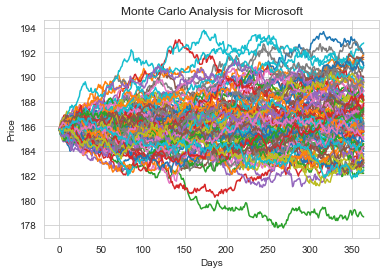

In [52]:
start_price = 185.75

for run in range(100): 
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
    
plt.xlabel("Days")
plt.ylabel("Price")
plt.title('Monte Carlo Analysis for Microsoft')

In [53]:
start_price = 1361.579956 

runs = 10000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

TypeError: title() missing 1 required positional argument: 'label'

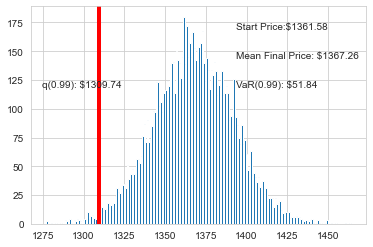

In [56]:
q = np.percentile(simulations,1)

plt.hist(simulations, bins=200)

plt.figtext(0.6,0.8, s= 'Start Price:$%.2f' % start_price)

plt.figtext(0.6,0.7, s= 'Mean Final Price: $%.2f' % simulations.mean())

plt.figtext(0.6,0.6, s= 'VaR(0.99): $%.2f' % (start_price - q))

plt.figtext(0.15,0.6, s= "q(0.99): $%.2f" % q)

plt.axvline(x=q, linewidth=4, color='r')

plt.title(s="Final price distribution for Google Stock(GOOGL) after %s days" % days, weight='bold',color='Y')

In [57]:
start_price = 2404.350098  

runs = 10000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

TypeError: title() missing 1 required positional argument: 'label'

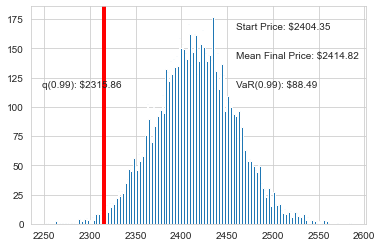

In [58]:
q = np.percentile(simulations,1)

plt.hist(simulations, bins=200)

plt.figtext(0.6,0.8, s='Start Price: $%.2f' % start_price)

plt.figtext(0.6,0.7, s='Mean Final Price: $%.2f' % simulations.mean())

plt.figtext(0.6,0.6, s='VaR(0.99): $%.2f' % (start_price - q))

plt.figtext(0.15, 0.6, s="q(0.99): $%.2f" % q)

plt.axvline(x=q, linewidth=4, color='r')

plt.title(s="Final price distribution for Amazon Stock(AMZN) after %s days" % days, weight='bold', color='G')

In [59]:
start_price = 78.292503

runs = 10000

simulations = np.zeros(runs)

for run in range(runs):    
   
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

TypeError: title() missing 1 required positional argument: 'label'

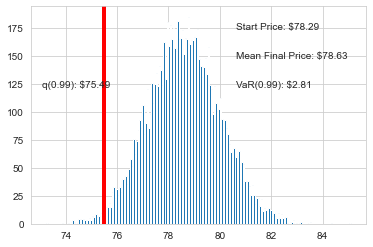

In [60]:
q = np.percentile(simulations,1)

plt.hist(simulations, bins=200)

plt.figtext(0.6,0.8, s='Start Price: $%.2f' % start_price)

plt.figtext(0.6,0.7, s='Mean Final Price: $%.2f' % simulations.mean())

plt.figtext(0.6,0.6, s='VaR(0.99): $%.2f' % (start_price - q))

plt.figtext(0.15, 0.6, s="q(0.99): $%.2f" % q)

plt.axvline(x=q, linewidth=4, color='r')

plt.title(s="Final price distribution for Apple Stock(AAPL) after %s days" % days, weight='bold', color='B')

In [61]:
start_price = 185.75

runs = 10000

simulations = np.zeros(runs)

for run in range(runs):    
   
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

TypeError: title() missing 1 required positional argument: 'label'

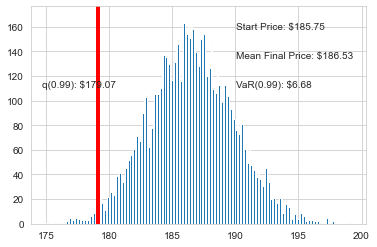

In [62]:
q = np.percentile(simulations,1)

plt.hist(simulations, bins=200)

plt.figtext(0.6,0.8, s='Start Price: $%.2f' % start_price)

plt.figtext(0.6,0.7, s='Mean Final Price: $%.2f' % simulations.mean())

plt.figtext(0.6,0.6, s='VaR(0.99): $%.2f' % (start_price - q))

plt.figtext(0.15, 0.6, s="q(0.99): $%.2f" % q)

plt.axvline(x=q, linewidth=4, color='r')

plt.title(s="Final price distribution for Microsoft Stock(MSFT) after %s days" % days, weight='bold', color='M')

In [63]:
NYSE_list = ['JNJ','NKE','WMT']

end = datetime.now()
start = datetime(end.year-1,end.month,end.day)

for stock in NYSE_list: 
    globals()[stock] = DataReader(stock,'yahoo',start,end)

In [64]:
JNJ.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-05-18,153.619995,150.460007,152.490005,150.520004,7388400.0,146.556808
2020-05-19,151.100006,148.399994,150.100006,149.020004,6107300.0,145.096283
2020-05-20,150.389999,147.270004,149.750000,147.679993,5713400.0,143.791565
2020-05-21,148.500000,145.820007,148.500000,146.710007,6487300.0,142.847137
2020-05-22,146.289993,144.059998,144.570007,144.369995,6140900.0,141.543152


In [65]:
JNJ.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,154.215198,151.784821,153.062341,152.969246,7.209169e+06,151.462099
std,8.429432,8.487752,8.331770,8.528576,2.570480e+06,9.393399
min,137.539993,133.649994,136.679993,137.110001,2.114900e+06,135.111618
25%,148.347504,145.852501,147.057499,146.955002,5.530875e+06,144.305485
50%,151.100006,149.260002,150.095001,149.954994,6.734950e+06,147.994926
75%,161.982498,159.790001,160.857502,160.537498,8.220650e+06,160.447502
max,173.649994,170.304993,171.479996,170.479996,2.250590e+07,170.389999


In [66]:
JNJ.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2020-05-18 to 2021-05-17
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       252 non-null    float64
 1   Low        252 non-null    float64
 2   Open       252 non-null    float64
 3   Close      252 non-null    float64
 4   Volume     252 non-null    float64
 5   Adj Close  252 non-null    float64
dtypes: float64(6)
memory usage: 13.8 KB


<AxesSubplot:title={'center':'Closing Price-JNJ'}, xlabel='Date'>

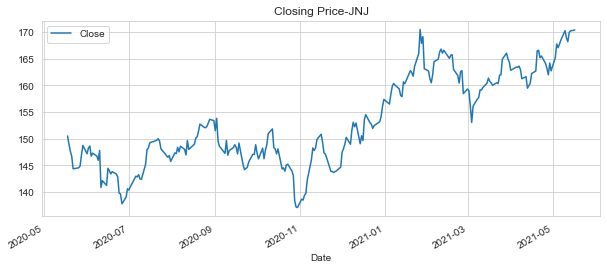

In [67]:
JNJ['Close'].plot(title='Closing Price-JNJ',legend=True, figsize=(10,4))

<AxesSubplot:title={'center':'Closing Price-NKE'}, xlabel='Date'>

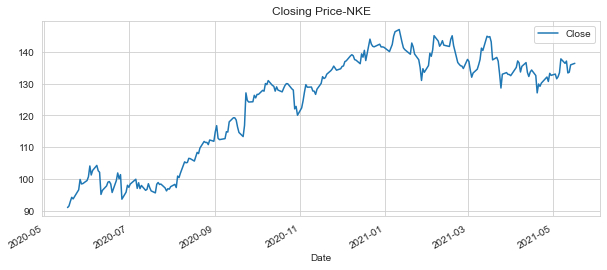

In [68]:
NKE['Close'].plot(title='Closing Price-NKE',legend=True,figsize=(10,4))

<AxesSubplot:title={'center':'Closing Price-WMT'}, xlabel='Date'>

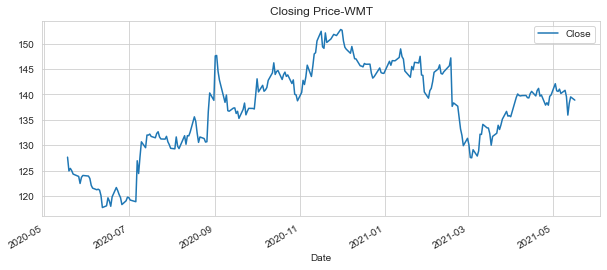

In [69]:
WMT['Close'].plot(title='Closing Price-WMT',legend=True,figsize=(10,4))

In [70]:
JNJ['Daily Return'] = JNJ['Close'].pct_change()

<AxesSubplot:xlabel='Daily Return', ylabel='Density'>

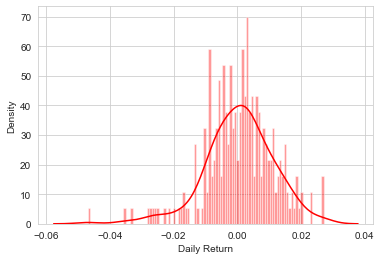

In [72]:
sns.distplot(JNJ['Daily Return'].dropna(),bins=100,color='red')

In [73]:
(JNJ['Daily Return'].dropna()).quantile(0.05)

-0.017310374643963178

In [74]:
WMT['Daily Return'] = WMT['Close'].pct_change()

C:\Users\guddu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Daily Return', ylabel='Density'>

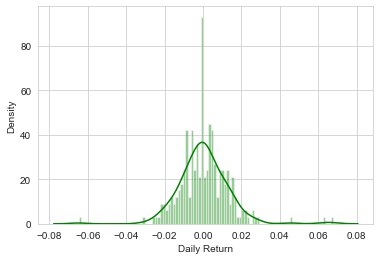

In [75]:
sns.distplot(WMT['Daily Return'].dropna(),bins=100,color='green')

In [77]:
(WMT['Daily Return'].dropna()).quantile(0.05)

-0.018700071240200844

In [78]:
NKE['Daily Return'] = NKE['Close'].pct_change()

C:\Users\guddu\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Daily Return', ylabel='Density'>

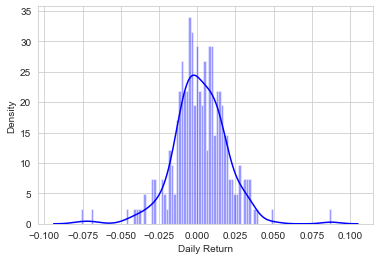

In [79]:
sns.distplot(NKE['Daily Return'].dropna(),bins=100,color='blue')

In [80]:
(NKE['Daily Return'].dropna()).quantile(0.05)

-0.027151576387199006